In [28]:
from ucimlrepo import fetch_ucirepo 
  

taiwanese_bankruptcy_prediction = fetch_ucirepo(id=572) 
  
 
X = taiwanese_bankruptcy_prediction.data.features 
y = taiwanese_bankruptcy_prediction.data.targets 
  

print(taiwanese_bankruptcy_prediction.metadata) 
  

print(taiwanese_bankruptcy_prediction.variables) 

{'uci_id': 572, 'name': 'Taiwanese Bankruptcy Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/572/taiwanese+bankruptcy+prediction', 'data_url': 'https://archive.ics.uci.edu/static/public/572/data.csv', 'abstract': 'The data were collected from the Taiwan Economic Journal  for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 6819, 'num_features': 95, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Bankrupt?'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5004D', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': Non

In [47]:
import re

def clean_column(col):
    col = col.strip()  
    # Convertir a mayúsculas
    col = col.upper()
    # Reemplazar espacios y paréntesis por _
    col = col.replace(" ", "_")
    col = col.replace("(", "_")
    col = col.replace(")", "")
    # Remover caracteres especiales 
    col = re.sub(r'[^A-Z0-9_]', '', col)

    col = col.strip('_')
    return col

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Cargar el dataset
try:
    df = pd.read_csv('data.csv')
except FileNotFoundError:
    print("Error: No encontrado")
    exit()

df.info()

print("\n--- Estadísticas Descriptivas de las primeras 5 columnas ---")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [49]:
# Renombrar todas las columnas
df.columns = [clean_column(col) for col in df.columns]
#df = df.drop("INDEX")

#print(df.head())
#print(df.columns)
#df.to_csv('data_clean.csv')
df_summary = df.iloc[:, :5].describe()
display(df_summary)

,BANKRUPT,ROA_C_BEFORE_INTEREST_AND_DEPRECIATION_BEFORE_INTEREST,ROA_A_BEFORE_INTEREST_AND__AFTER_TAX,ROA_B_BEFORE_INTEREST_AND_DEPRECIATION_AFTER_TAX,OPERATING_GROSS_MARGIN
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948
std,0.176710,0.060686,0.065620,0.061595,0.016934
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445
50%,0.000000,0.502706,0.559802,0.552278,0.605997
75%,0.000000,0.535563,0.589157,0.584105,0.613914
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(df)

,BANKRUPT,ROA_C_BEFORE_INTEREST_AND_DEPRECIATION_BEFORE_INTEREST,ROA_A_BEFORE_INTEREST_AND__AFTER_TAX,ROA_B_BEFORE_INTEREST_AND_DEPRECIATION_AFTER_TAX,OPERATING_GROSS_MARGIN,REALIZED_SALES_GROSS_MARGIN,OPERATING_PROFIT_RATE,PRETAX_NET_INTEREST_RATE,AFTERTAX_NET_INTEREST_RATE,NONINDUSTRY_INCOME_AND_EXPENDITUREREVENUE,CONTINUOUS_INTEREST_RATE__AFTER_TAX,OPERATING_EXPENSE_RATE,RESEARCH_AND_DEVELOPMENT_EXPENSE_RATE,CASH_FLOW_RATE,INTERESTBEARING_DEBT_INTEREST_RATE,TAX_RATE__A,NET_VALUE_PER_SHARE__B,NET_VALUE_PER_SHARE__A,NET_VALUE_PER_SHARE__C,PERSISTENT_EPS_IN_THE_LAST_FOUR_SEASONS,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE__YUAN,OPERATING_PROFIT_PER_SHARE__YUAN,PER_SHARE_NET_PROFIT_BEFORE_TAX__YUAN,REALIZED_SALES_GROSS_PROFIT_GROWTH_RATE,OPERATING_PROFIT_GROWTH_RATE,AFTERTAX_NET_PROFIT_GROWTH_RATE,REGULAR_NET_PROFIT_GROWTH_RATE,CONTINUOUS_NET_PROFIT_GROWTH_RATE,TOTAL_ASSET_GROWTH_RATE,NET_VALUE_GROWTH_RATE,TOTAL_ASSET_RETURN_GROWTH_RATE_RATIO,CASH_REINVESTMENT,CURRENT_RATIO,QUICK_RATIO,INTEREST_EXPENSE_RATIO,TOTAL_DEBTTOTAL_NET_WORTH,DEBT_RATIO,NET_WORTHASSETS,LONGTERM_FUND_SUITABILITY_RATIO__A,BORROWING_DEPENDENCY,CONTINGENT_LIABILITIESNET_WORTH,OPERATING_PROFITPAIDIN_CAPITAL,NET_PROFIT_BEFORE_TAXPAIDIN_CAPITAL,INVENTORY_AND_ACCOUNTS_RECEIVABLENET_VALUE,TOTAL_ASSET_TURNOVER,ACCOUNTS_RECEIVABLE_TURNOVER,AVERAGE_COLLECTION_DAYS,INVENTORY_TURNOVER_RATE__TIMES,FIXED_ASSETS_TURNOVER_FREQUENCY,NET_WORTH_TURNOVER_RATE__TIMES,REVENUE_PER_PERSON,OPERATING_PROFIT_PER_PERSON,ALLOCATION_RATE_PER_PERSON,WORKING_CAPITAL_TO_TOTAL_ASSETS,QUICK_ASSETSTOTAL_ASSETS,CURRENT_ASSETSTOTAL_ASSETS,CASHTOTAL_ASSETS,QUICK_ASSETSCURRENT_LIABILITY,CASHCURRENT_LIABILITY,CURRENT_LIABILITY_TO_ASSETS,OPERATING_FUNDS_TO_LIABILITY,INVENTORYWORKING_CAPITAL,INVENTORYCURRENT_LIABILITY,CURRENT_LIABILITIESLIABILITY,WORKING_CAPITALEQUITY,CURRENT_LIABILITIESEQUITY,LONGTERM_LIABILITY_TO_CURRENT_ASSETS,RETAINED_EARNINGS_TO_TOTAL_ASSETS,TOTAL_INCOMETOTAL_EXPENSE,TOTAL_EXPENSEASSETS,CURRENT_ASSET_TURNOVER_RATE,QUICK_ASSET_TURNOVER_RATE,WORKING_CAPITCAL_TURNOVER_RATE,CASH_TURNOVER_RATE,CASH_FLOW_TO_SALES,FIXED_ASSETS_TO_ASSETS,CURRENT_LIABILITY_TO_LIABILITY,CURRENT_LIABILITY_TO_EQUITY,EQUITY_TO_LONGTERM_LIABILITY,CASH_FLOW_TO_TOTAL_ASSETS,CASH_FLOW_TO_LIABILITY,CFO_TO_ASSETS,CASH_FLOW_TO_EQUITY,CURRENT_LIABILITY_TO_CURRENT_ASSETS,LIABILITYASSETS_FLAG,NET_INCOME_TO_TOTAL_ASSETS,TOTAL_ASSETS_TO_GNP_PRICE,NOCREDIT_INTERVAL,GROSS_PROFIT_TO_SALES,NET_INCOME_TO_STOCKHOLDERS_EQUITY,LIABILITY_TO_EQUITY,DEGREE_OF_FINANCIAL_LEVERAGE__DFL,INTEREST_COVERAGE_RATIO__INTEREST_EXPENSE_TO_EBIT,NET_INCOME_FLAG,EQUITY_TO_LIABILITY
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,0.000126,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,0.000147,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,0.000290,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751111,0.

/var/folders/vf/cwqqyfbd41qbfztcr40qh84ndslkyz/T/ipykernel_2096/1735126843.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='BANKRUPT',palette='rainbow')


<Axes: xlabel='BANKRUPT', ylabel='count'>

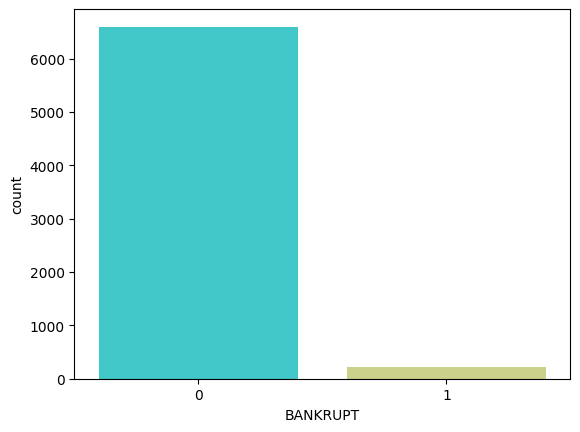

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df,x='BANKRUPT',palette='rainbow')


In [56]:
Y_column_name = 'BANKRUPT' 

# Analizar la distribución de la variable objetivo
print("\n--- Distribución de la Variable Objetivo ---")
print(df[Y_column_name].value_counts())
print("\nPorcentaje de empresas en bancarrota (1):")
print(df[Y_column_name].value_counts(normalize=True)[1] * 100)

# Separar características (X) y la variable objetivo (Y)
X = df.drop(Y_column_name, axis=1)
y = df[Y_column_name]



--- Distribución de la Variable Objetivo ---
BANKRUPT
0    6599
1     220
Name: count, dtype: int64

Porcentaje de empresas en bancarrota (1):
3.2262795131250916


In [57]:
print("\n--- Verificación de Valores Nulos ---")
missing_values = X.isnull().sum()
print(missing_values[missing_values > 0])

if (missing_values > 0).any():
    print("\nSe han encontrado valores nulos. Procediendo con la imputación.")
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='median')
    X_imputed = imputer.fit_transform(X)
    X = pd.DataFrame(X_imputed, columns=X.columns)
else:
    print("\nNo se encontraron valores nulos en el dataset (confirmado).")


--- Verificación de Valores Nulos ---
Series([], dtype: int64)

No se encontraron valores nulos en el dataset (confirmado).


In [58]:
def cap_outliers(data, lower_percentile=0.01, upper_percentile=0.99):
    for column in data.columns:
        if np.issubdtype(data[column].dtype, np.number):
            lower_bound = data[column].quantile(lower_percentile)
            upper_bound = data[column].quantile(upper_percentile)
            data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
            data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

# Opcional: Aplicar capping
# X_capped = cap_outliers(X.copy())

In [59]:
scaler = StandardScaler()


# Identificar columnas a escalar (la mayoría de X1 a X95 son continuas)
columns_to_scale = X.columns.tolist()

X_scaled = scaler.fit_transform(X[columns_to_scale])

X_scaled_df = pd.DataFrame(X_scaled, columns=columns_to_scale)

print("\n--- Datos Estandarizados (Primeras Filas) ---")
print(X_scaled_df.head())


--- Datos Estandarizados (Primeras Filas) ---
   ROA_C_BEFORE_INTEREST_AND_DEPRECIATION_BEFORE_INTEREST  \
0                                          -2.217909        
1                                          -0.673828        
2                                          -1.303672        
3                                          -1.735886        
4                                          -0.661778        

   ROA_A_BEFORE_INTEREST_AND__AFTER_TAX  \
0                             -2.045798   
1                             -0.311068   
2                             -0.908420   
3                             -1.636209   
4                             -0.307745   

   ROA_B_BEFORE_INTEREST_AND_DEPRECIATION_AFTER_TAX  OPERATING_GROSS_MARGIN  \
0                                         -2.400361               -0.383334   
1                                         -0.598450                0.135068   
2                                         -1.319910               -0.383759   
3          

In [67]:
abs(df.corr()['BANKRUPT']).sort_values(ascending=False).head(20)

BANKRUPT                                                  1.000000
NET_INCOME_TO_TOTAL_ASSETS                                0.315457
ROA_A_BEFORE_INTEREST_AND__AFTER_TAX                      0.282941
ROA_B_BEFORE_INTEREST_AND_DEPRECIATION_AFTER_TAX          0.273051
ROA_C_BEFORE_INTEREST_AND_DEPRECIATION_BEFORE_INTEREST    0.260807
NET_WORTHASSETS                                           0.250161
DEBT_RATIO                                                0.250161
PERSISTENT_EPS_IN_THE_LAST_FOUR_SEASONS                   0.219560
RETAINED_EARNINGS_TO_TOTAL_ASSETS                         0.217779
NET_PROFIT_BEFORE_TAXPAIDIN_CAPITAL                       0.207857
PER_SHARE_NET_PROFIT_BEFORE_TAX__YUAN                     0.201395
CURRENT_LIABILITY_TO_ASSETS                               0.194494
WORKING_CAPITAL_TO_TOTAL_ASSETS                           0.193083
NET_INCOME_TO_STOCKHOLDERS_EQUITY                         0.180987
BORROWING_DEPENDENCY                                      0.17

In [68]:
thres=0.2
fil_cols=[col for col in df.columns if abs(df.corr()['BANKRUPT'][col])>thres]
df_filt=df[fil_cols]

<Axes: >

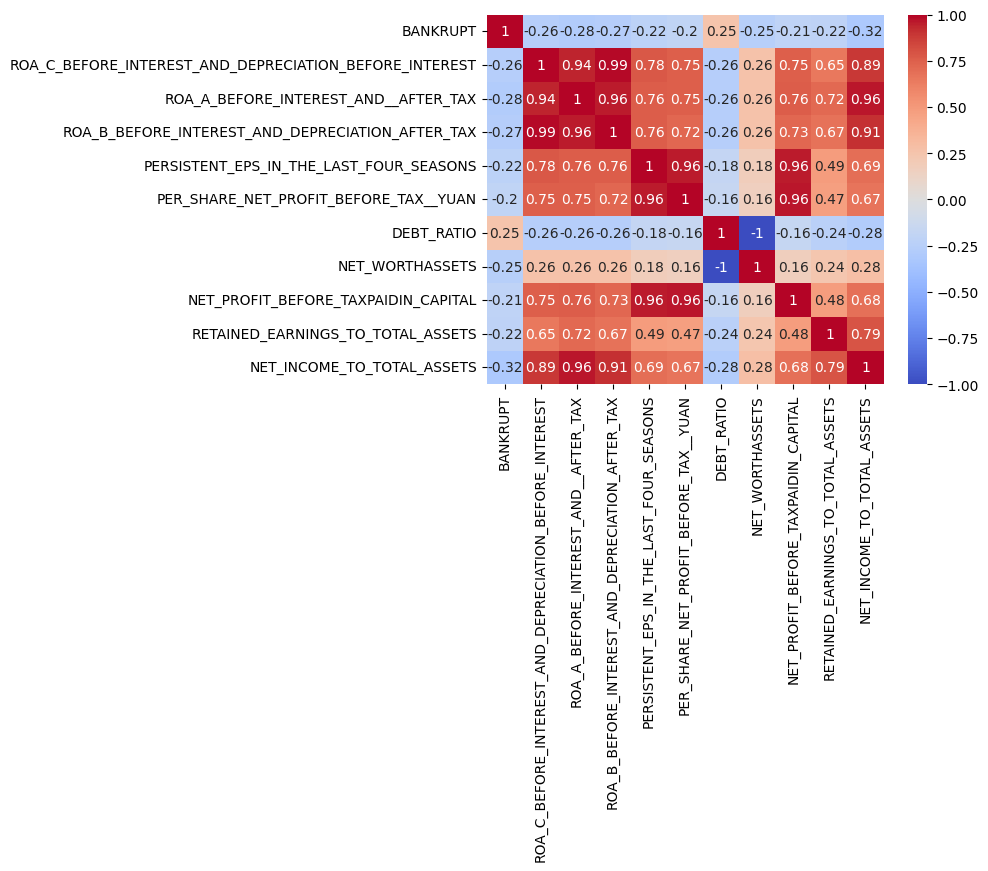

In [69]:
sns.heatmap(df_filt.corr(),cmap='coolwarm',annot=True)

In [70]:
# 1. Dividir el dataset en conjuntos de entrenamiento y prueba (antes de aplicar SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n--- Distribución de clases en el conjunto de entrenamiento antes de SMOTE ---")
print(y_train.value_counts())

# 2. Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"\n--- Distribución de clases en el conjunto de entrenamiento después de SMOTE ---")
print(y_train_resampled.value_counts())


--- Distribución de clases en el conjunto de entrenamiento antes de SMOTE ---
BANKRUPT
0    5279
1     176
Name: count, dtype: int64

--- Distribución de clases en el conjunto de entrenamiento después de SMOTE ---
BANKRUPT
0    5279
1    5279
Name: count, dtype: int64


/Users/rpitti/Downloads/OneDrive_5_6-9-2025/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Inicializar y entrenar el modelo de Regresión Logística
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Entrenamos con los datos balanceados
log_reg.fit(X_train_resampled, y_train_resampled)

# Predicciones en el conjunto de prueba (NO balanceado)
y_pred_log_reg = log_reg.predict(X_test)
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1] # Probabilidades para la clase 1 (Bancarrota)

# Evaluación
print("--- Evaluación: Regresión Logística ---")
print(classification_report(y_test, y_pred_log_reg))
print("Área bajo la curva ROC (AUC):", roc_auc_score(y_test, y_prob_log_reg))

--- Evaluación: Regresión Logística ---
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1320
           1       0.20      0.80      0.32        44

    accuracy                           0.89      1364
   macro avg       0.60      0.85      0.63      1364
weighted avg       0.97      0.89      0.92      1364

Área bajo la curva ROC (AUC): 0.9146349862258952


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar y entrenar el modelo Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamos con los datos balanceados
rf_clf.fit(X_train_resampled, y_train_resampled)

# Predicciones en el conjunto de prueba (NO balanceado)
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# Evaluación
print("\n--- Evaluación: Random Forest ---")
print(classification_report(y_test, y_pred_rf))
print("Área bajo la curva ROC (AUC):", roc_auc_score(y_test, y_prob_rf))


--- Evaluación: Random Forest ---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.44      0.61      0.51        44

    accuracy                           0.96      1364
   macro avg       0.71      0.79      0.74      1364
weighted avg       0.97      0.96      0.96      1364

Área bajo la curva ROC (AUC): 0.937629132231405


In [14]:
import xgboost as xgb

# Inicializar y entrenar el modelo XGBoost
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# Entrenamos con los datos balanceados
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Predicciones en el conjunto de prueba
y_pred_xgb = xgb_clf.predict(X_test)
y_prob_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# Evaluación
print("\n--- Evaluación: XGBoost ---")
print(classification_report(y_test, y_pred_xgb))
print("Área bajo la curva ROC (AUC):", roc_auc_score(y_test, y_prob_xgb))

/Users/rpitti/Downloads/OneDrive_5_6-9-2025/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:17:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Evaluación: XGBoost ---
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.48      0.52      0.50        44

    accuracy                           0.97      1364
   macro avg       0.73      0.75      0.74      1364
weighted avg       0.97      0.97      0.97      1364

Área bajo la curva ROC (AUC): 0.9491219008264463


In [71]:
from lightgbm import LGBMClassifier
# Separar X y y
X = df.drop('BANKRUPT', axis=1)
y = df['BANKRUPT']

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Instanciar modelo
clf = LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    is_unbalance=True,
    learning_rate=0.05,
    num_leaves=31,
    n_estimators=200
)

# Entrenar con early stopping
clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='auc'
)

# Predicciones
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Evaluar
print(confusion_matrix(y_test, y_pred))
print("\n--- Evaluación: LightGBM ---")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))
gini = 2 * roc_auc_score(y_test, y_pred_prob) - 1

print(f"Gini: {gini:.4f}")

[LightGBM] [Info] Number of positive: 176, number of negative: 5279
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23713
[LightGBM] [Info] Number of data points in the train set: 5455, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.032264 -> initscore=-3.401008
[LightGBM] [Info] Start training from score -3.401008
[[1303   17]
 [  23   21]]

--- Evaluación: LightGBM ---
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1320
           1       0.55      0.48      0.51        44

    accuracy                           0.97      1364
   macro avg       0.77      0.73      0.75      1364
weighted avg       0.97      0.97      0.97      1364

ROC AUC: 0.9494318181818182
Gini: 0.8989


/Users/rpitti/Downloads/OneDrive_5_6-9-2025/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/rpitti/Downloads/OneDrive_5_6-9-2025/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


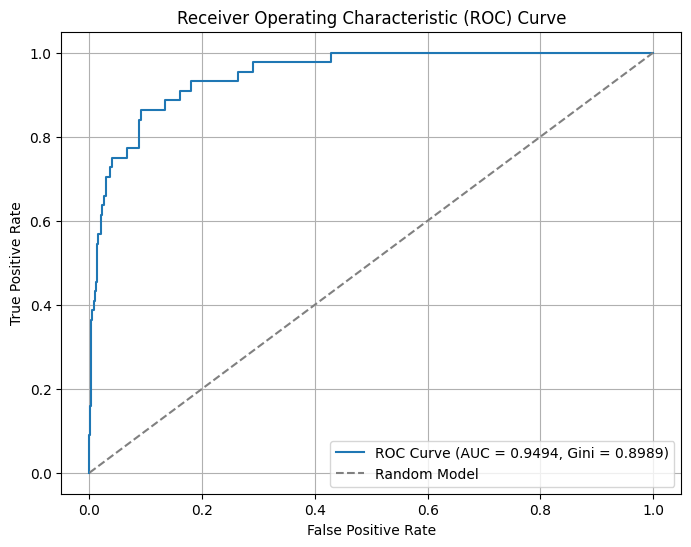

In [16]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular AUC
auc = roc_auc_score(y_test, y_pred_prob)
gini = 2 * auc - 1

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f}, Gini = {gini:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Model')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

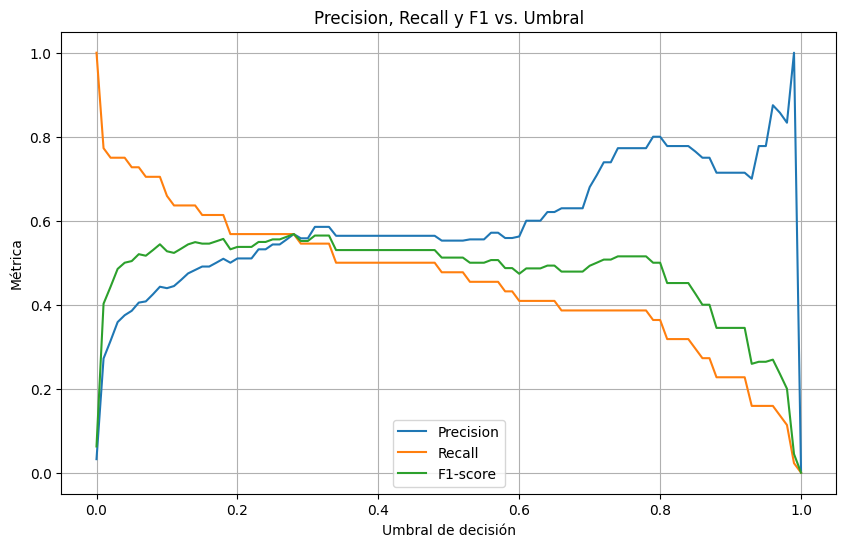

Mejor umbral según F1: 0.28 (F1=0.5682)


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Rango de umbrales
thresholds = np.arange(0.0, 1.01, 0.01)

precision_list = []
recall_list = []
f1_list = []

for t in thresholds:
    y_pred_t = (y_pred_prob >= t).astype(int)
    precision_list.append(precision_score(y_test, y_pred_t, zero_division=0))
    recall_list.append(recall_score(y_test, y_pred_t))
    f1_list.append(f1_score(y_test, y_pred_t))

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_list, label='Precision')
plt.plot(thresholds, recall_list, label='Recall')
plt.plot(thresholds, f1_list, label='F1-score')
plt.xlabel('Umbral de decisión')
plt.ylabel('Métrica')
plt.title('Precision, Recall y F1 vs. Umbral')
plt.legend()
plt.grid(True)
plt.show()

# Opcional: Umbral con máximo F1
best_idx = np.argmax(f1_list)
best_threshold = thresholds[best_idx]
print(f"Mejor umbral según F1: {best_threshold:.2f} (F1={f1_list[best_idx]:.4f})")


In [72]:
# Predicción con umbral óptimo
y_pred_opt = (y_pred_prob >= 0.28).astype(int)

# Nuevo reporte
print("\n--- Evaluación: LightGBM con HyperParameter Tuning ---")
print(classification_report(y_test, y_pred_opt))

# AUC se mantiene igual porque no depende del umbral
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc:.4f}")


--- Evaluación: LightGBM con HyperParameter Tuning ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1320
           1       0.57      0.57      0.57        44

    accuracy                           0.97      1364
   macro avg       0.78      0.78      0.78      1364
weighted avg       0.97      0.97      0.97      1364

AUC: 0.9494


In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_opt)
print("Matriz de confusión con umbral 0.28:")
print(cm)

Matriz de confusión con umbral 0.28:
[[1301   19]
 [  19   25]]


/Users/rpitti/Downloads/OneDrive_5_6-9-2025/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/rpitti/Downloads/OneDrive_5_6-9-2025/.venv/lib/python3.9/site-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


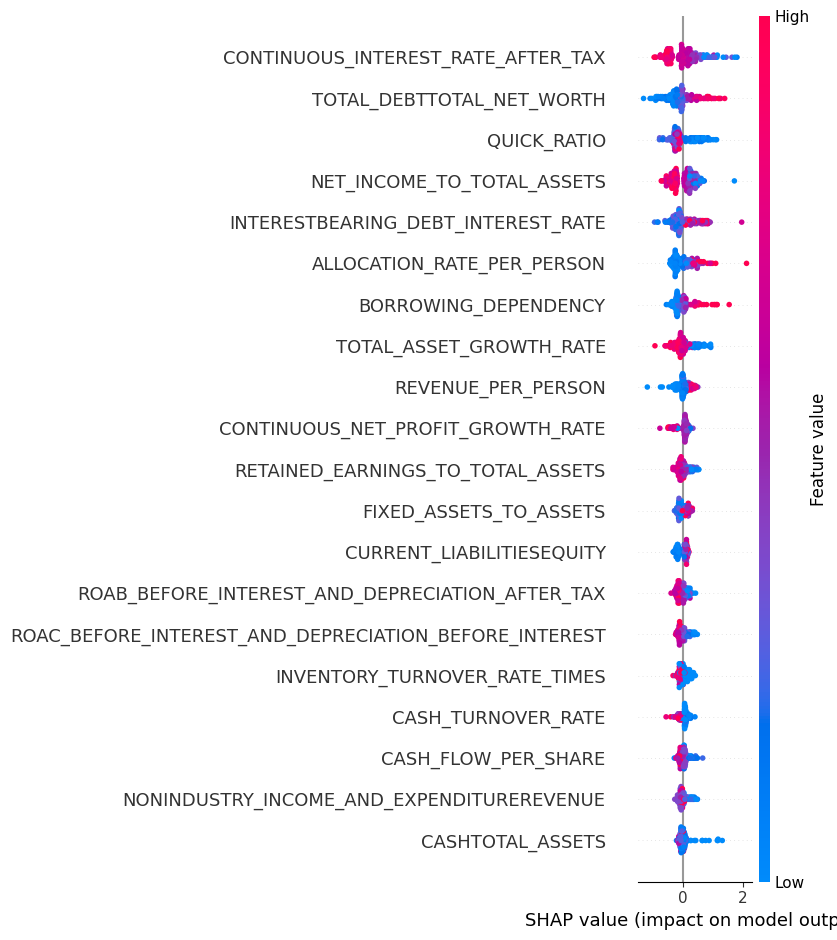

In [ ]:
import shap
import lightgbm as lgb
import matplotlib.pyplot as plt

X_sample = X_test[:200]

# Crear el TreeExplainer
explainer = shap.TreeExplainer(clf)

shap_values = explainer.shap_values(X_sample)

# Visualizar importancia global
shap.summary_plot(shap_values, X_sample, feature_names=df.drop('BANKRUPT', axis=1).columns)


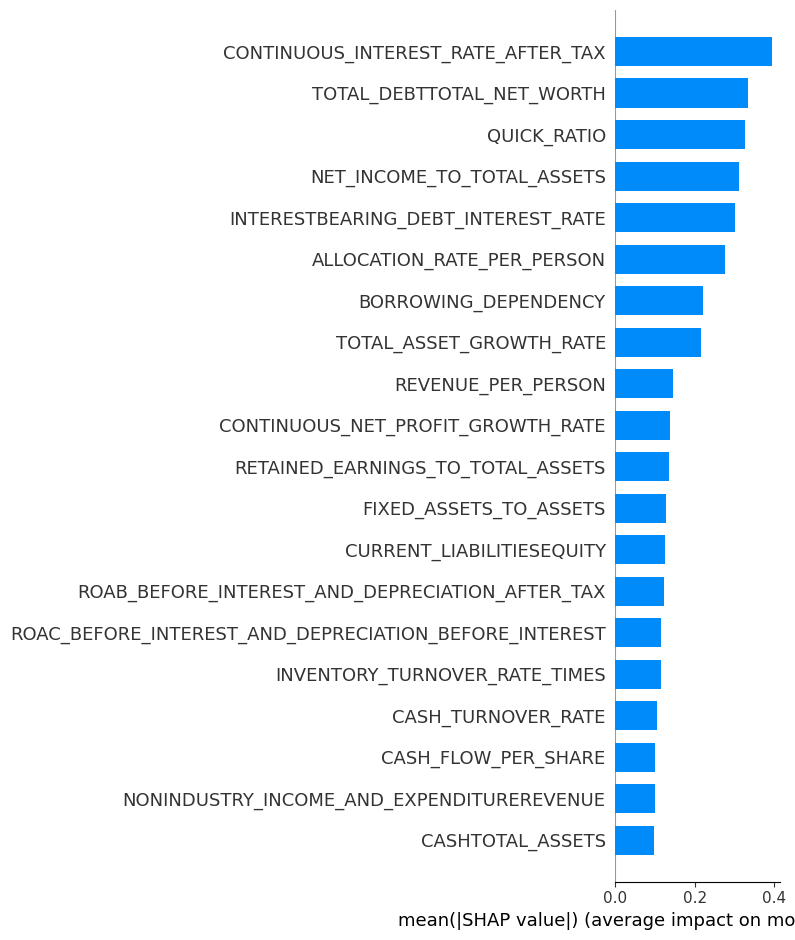

In [21]:
# Importancia de variables (bar plot)
shap.summary_plot(shap_values, X_sample, plot_type="bar", feature_names=df.drop('BANKRUPT', axis=1).columns)


In [22]:
shap.initjs()

X_sample_df = pd.DataFrame(X_test, columns=df.drop('BANKRUPT', axis=1).columns)


shap_values = explainer.shap_values(X_sample_df)

shap.force_plot(
    explainer.expected_value,
    shap_values[0, :],
    X_sample_df.iloc[0, :],
    #matplotlib=True
)


/Users/rpitti/Downloads/OneDrive_5_6-9-2025/.venv/lib/python3.9/site-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
